Please upload 'Mall_Customers.csv'


Saving Mall_Customers.csv to Mall_Customers (1).csv
Sample data:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


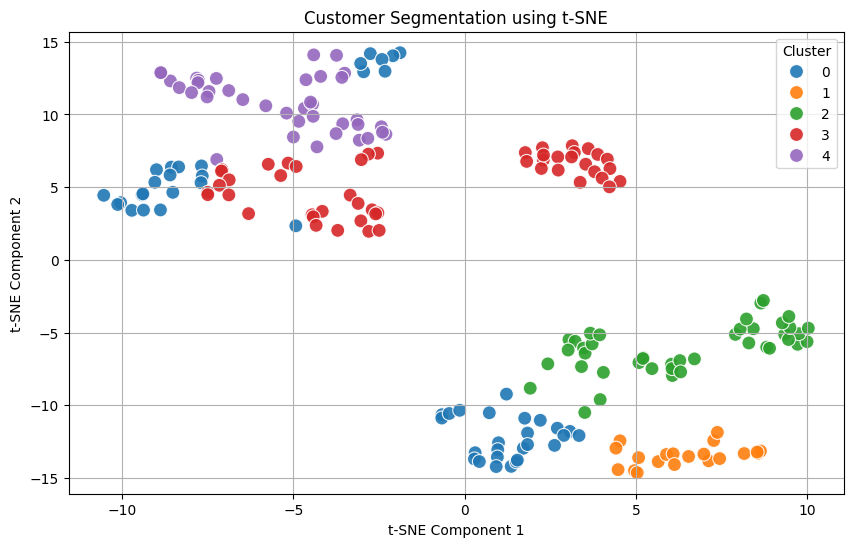

In [7]:
# Customer Segmentation using t-SNE in Google Colab (with manual file upload)

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from google.colab import files

# Step 2: Upload the dataset
print("Please upload 'Mall_Customers.csv'")
uploaded = files.upload()

# Step 3: Load the dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Step 4: Display first few rows
print("Sample data:")
print(df.head())

# Step 5: Preprocess data
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})
features = ['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
X_scaled = StandardScaler().fit_transform(X)

# Step 6: Apply KMeans for coloring clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 7: Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(X_scaled)
df['TSNE-1'] = tsne_results[:, 0]
df['TSNE-2'] = tsne_results[:, 1]

# Step 8: Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TSNE-1', y='TSNE-2', hue='Cluster', palette='tab10', s=100, alpha=0.9)
plt.title('Customer Segmentation using t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
